<a href="https://colab.research.google.com/github/MBSant/Python/blob/main/Modelo_Dummy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto de análise de dados com o modelo DUMMY em uma Série Temporal

### Projeto realizado na aula do Prof. Rafinha dos Dados na plataforma FLAI.

#### Saldo das operações de crédito por atividade econômica - Indústria de alimentos
Dados retirados no site do Banco Central:
link: https://dadosabertos.bcb.gov.br/dataset/27743-saldo-das-operacoes-de-credito-por-atividade-economica---industria-de-alimentos


O modelo Dummy é bastante simples ele realiza a predição no próximo período a partir do período anterior.

In [ ]:
#importando as bibliotecas:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#Carregando os dados do Banco Central que estão em CSV.
df =pd.read_csv('http://api.bcb.gov.br/dados/serie/bcdata.sgs.27743/dados?formato=csv', sep =';')

In [ ]:
#Apresentando as 5 primeiras linhas do dataframe
df.head()

,data,valor
0,01/01/2012,59708
1,01/02/2012,59263
2,01/03/2012,63323
3,01/04/2012,65128
4,01/05/2012,66570


             Campo	      |            Valor
         Tipo da série      |    	Série temporal mensal
         Unidade de medida  |	    Milhões de reais
         Código SGS         | 	  27743

In [ ]:
#Transformando a data que estava em formato de texto (dd/mm/yyyy) em um formato padrão de data (YYYY-MM-DD)
df.loc[:,'data'] = pd.to_datetime(df.data, format = '%d/%m/%Y')
df

,data,valor
0,2012-01-01,59708
1,2012-02-01,59263
2,2012-03-01,63323
3,2012-04-01,65128
4,2012-05-01,66570
...,...,...
117,2021-10-01,126181
118,2021-11-01,123605
119,2021-12-01,124827
120,2022-01-01,123909


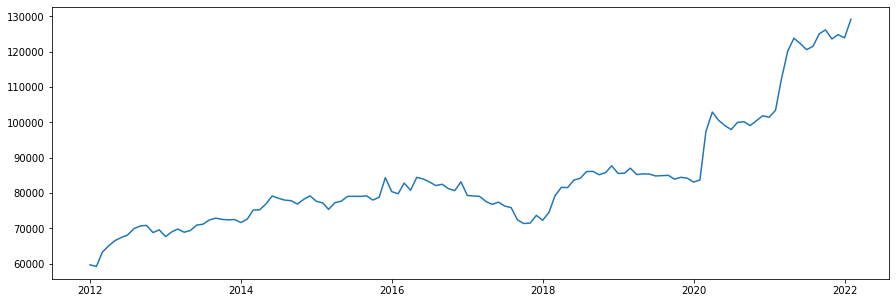

In [ ]:
#Vamos projetar um gráfico com os dados para fazer uma primeira análise de como estão se comportando.
#Especifico o tamanho do gráfico que quero apresentar.
plt.figure(figsize = (15,5))

#Atribuindo as variáveis que quero no gráfico.
plt.plot(df.data,df.valor)
plt.show()

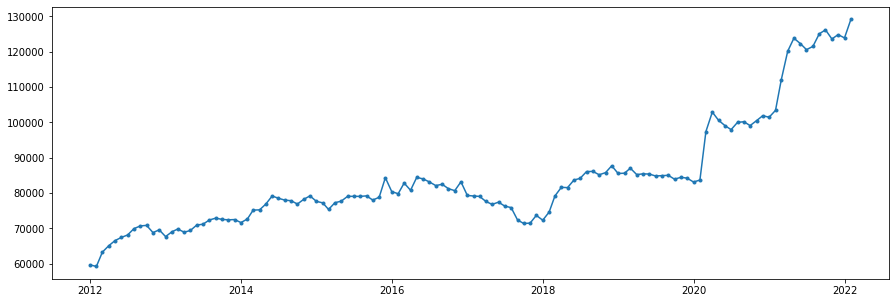

In [ ]:
plt.figure(figsize = (15,5))
#Colocando pontos onde estão sendo mensurados os dados.
plt.plot(df.data,df.valor,'.-')
plt.show()

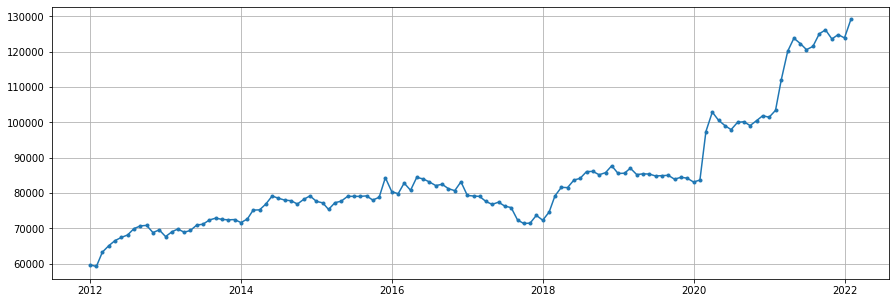

In [ ]:
#Para colocar as linhas de fundo para ajudar na visualização plt.grid()
plt.figure(figsize = (15,5))
plt.plot(df.data,df.valor,'.-')
plt.grid()
plt.show()

In [ ]:
#pegando um elemento da tabela pelo indice
df.iloc[0] #irá apresentar a primeira linha do dataframe

data     2012-01-01 00:00:00
valor                  59708
Name: 0, dtype: object

In [ ]:
#pegando um elemento a partir de uma condição das colunas
df.loc[df.data> '2020-01-01'] #solicito a apresentação dos dados cuja a data seja maior que primeiro de janeiro de 2020.

,data,valor
97,2020-02-01,83702
98,2020-03-01,97424
99,2020-04-01,102926
100,2020-05-01,100623
101,2020-06-01,99107
102,2020-07-01,97960
103,2020-08-01,100015
104,2020-09-01,100193
105,2020-10-01,99106
106,2020-11-01,100494


In [ ]:
#buscando o primeiro elemento[0] da condição solicitada (Ser maior que primeiro de janeiro de 2020)
df.loc[df.data> '2020-01-01'].iloc[0]

data     2020-02-01 00:00:00
valor                  83702
Name: 97, dtype: object

In [ ]:
# se eu quiser que me apresente somente o valor da primeira linha da condicional solicitada.
df.loc[df.data> '2020-01-01'].iloc[0].valor 
#Quando utilizo a função iloc[] utilizo a posição que o elemento 
#apresenta na lista gerada e não o número do índice correspondente.

83702

In [ ]:
#Se colocar só o argumento valor, serão apresentados só os valores cuja a data é posterior a 2020-01-01.
df.loc[df.data> '2020-01-01'].valor

97      83702
98      97424
99     102926
100    100623
101     99107
102     97960
103    100015
104    100193
105     99106
106    100494
107    101895
108    101474
109    103412
110    112098
111    120137
112    123822
113    122310
114    120585
115    121501
116    125075
117    126181
118    123605
119    124827
120    123909
121    129154
Name: valor, dtype: int64

In [ ]:
#Diferença entre LOC e ILOC
#Função ILOC[] pede a posição do elemento a partir d lista gerada.
#Se quiser buscar um número específico da linha (indice) ultilizo a função LOC´[].

df.loc[df.data> '2020-01-01'].valor.loc[97] #Estou pendindo que me apresente o valor do índice 97 do Dataframe.

83702

In [ ]:
#Criando uma lista onde serão adicionadas as predições para cada mês
predicoes = []
#Criando uma lista onde serão adicionados os erros.Para poder avaliar se o modelo é bom ou não.
erros = []
#Criando um FORLOOP. Para cada data do dataframe executar o código e depois vai para a data seguinte.
for dat in df.data:
  if dat == pd.to_datetime('2012-01-01'): #Criando uma condição para que na primeira data do dataframe não seja buscada a data do mês anterior. 
    erros.append(np.nan)  #Indicando que nesse caso será adicionado na lista a condição NAN "not a number' tanto na lista de erros quanto na lista de predições.
    predicoes.append(np.nan)
    continue #Indicando que seve seguir o comando para as linhas seguintes.
    
  valor = df.loc[ df.data == dat].valor.iloc[0]
  pred  = df.loc[df.data == (dat-pd.DateOffset(months = 1))].valor.iloc[0]
  predicoes.append(pred)
  erros.append(pred - valor)


In [ ]:
predicoes

[nan,
 59708,
 59263,
 63323,
 65128,
 66570,
 67476,
 68163,
 69965,
 70727,
 70877,
 68837,
 69617,
 67707,
 69077,
 69850,
 68944,
 69438,
 70974,
 71207,
 72405,
 72930,
 72576,
 72443,
 72526,
 71677,
 72691,
 75200,
 75271,
 76891,
 79193,
 78553,
 78028,
 77856,
 76915,
 78248,
 79223,
 77684,
 77239,
 75393,
 77296,
 77716,
 79079,
 79099,
 79080,
 79224,
 78043,
 78827,
 84364,
 80426,
 79835,
 82844,
 80811,
 84462,
 84012,
 83179,
 82136,
 82506,
 81276,
 80698,
 83198,
 79339,
 79187,
 79079,
 77641,
 76816,
 77447,
 76333,
 75909,
 72411,
 71411,
 71525,
 73713,
 72337,
 74654,
 79198,
 81640,
 81559,
 83701,
 84178,
 86092,
 86147,
 85195,
 85793,
 87736,
 85561,
 85637,
 87061,
 85248,
 85449,
 85400,
 84852,
 84946,
 85038,
 83943,
 84479,
 84240,
 83142,
 83702,
 97424,
 102926,
 100623,
 99107,
 97960,
 100015,
 100193,
 99106,
 100494,
 101895,
 101474,
 103412,
 112098,
 120137,
 123822,
 122310,
 120585,
 121501,
 125075,
 126181,
 123605,
 124827,
 123909]

In [ ]:
#Criando um DataFrame
df_pred = pd.DataFrame() #criado um DataFrame vazio.
df_pred.loc[:, 'data'] = df.data #criando um DataFrame com a coluna data igual às data apresentada no df inicial.
df_pred

,data
0,2012-01-01
1,2012-02-01
2,2012-03-01
3,2012-04-01
4,2012-05-01
...,...
117,2021-10-01
118,2021-11-01
119,2021-12-01
120,2022-01-01


In [ ]:
#Adicionando mais colunas no DataFrame de predições.
df_pred.loc[:, 'valor'] = df.valor
df_pred.loc[:, 'predições'] = predicoes
df_pred.loc[:, 'erros'] = erros
df_pred

,data,valor,predições,erros
0,2012-01-01,59708,NaN,NaN
1,2012-02-01,59263,59708.0,445.0
2,2012-03-01,63323,59263.0,-4060.0
3,2012-04-01,65128,63323.0,-1805.0
4,2012-05-01,66570,65128.0,-1442.0
...,...,...,...,...
117,2021-10-01,126181,125075.0,-1106.0
118,2021-11-01,123605,126181.0,2576.0
119,2021-12-01,124827,123605.0,-1222.0
120,2022-01-01,123909,124827.0,918.0


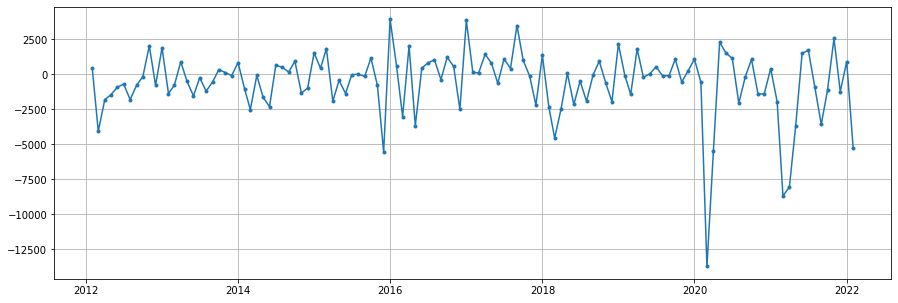

In [ ]:
#Criando um gráfico com as predições e os erros.
plt.figure(figsize = (15,5))
plt.plot(df_pred.data, df_pred.erros, '.-')

plt.grid()
plt.show()

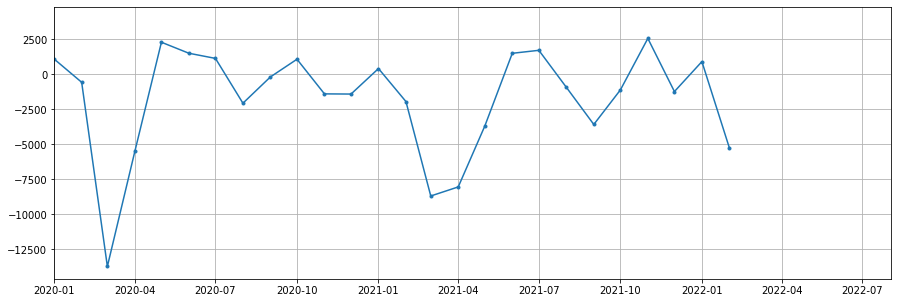

In [ ]:
plt.figure(figsize = (15,5))
plt.plot(df_pred.data, df_pred.erros, '.-')
plt.xlim(left = pd.to_datetime ('2020-01-01'))
plt.grid()
plt.show()

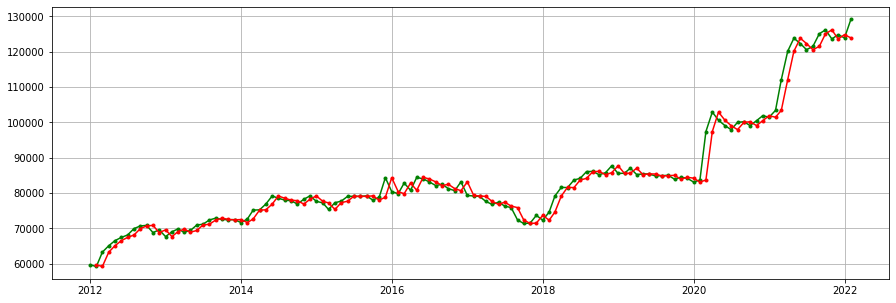

In [ ]:
plt.figure(figsize = (15,5))
plt.plot(df_pred.data, df_pred.valor, 'g.-') 
#Por padrão a linha do primeiro argumento será 
#azul e do segundo laranja. Para alterar inserindo uma letra 
#conforme a cor que deseja. b= blue; g = green...
plt.plot(df_pred.data, df_pred.predições, 'r.-')
plt.grid()
plt.show()

### Realizando essa mesma análise Dummy por outra forma.

In [ ]:
df.valor

0       59708
1       59263
2       63323
3       65128
4       66570
        ...  
117    126181
118    123605
119    124827
120    123909
121    129154
Name: valor, Length: 122, dtype: int64

In [ ]:
# A função shift(1) pula o primeiro argumento e a adiciona NAN no valor inicial.
df.valor.shift(1)

0           NaN
1       59708.0
2       59263.0
3       63323.0
4       65128.0
         ...   
117    125075.0
118    126181.0
119    123605.0
120    124827.0
121    123909.0
Name: valor, Length: 122, dtype: float64

In [ ]:
#Criando uma nova coluna chamada Predições e atribuindo a ela o valor com a função shift(1).
df.loc[: , 'Predicoes'] = df.valor.shift(1)
df

,data,valor,Predições,Predicoes
0,2012-01-01,59708,NaN,NaN
1,2012-02-01,59263,59708.0,59708.0
2,2012-03-01,63323,59263.0,59263.0
3,2012-04-01,65128,63323.0,63323.0
4,2012-05-01,66570,65128.0,65128.0
...,...,...,...,...
117,2021-10-01,126181,125075.0,125075.0
118,2021-11-01,123605,126181.0,126181.0
119,2021-12-01,124827,123605.0,123605.0
120,2022-01-01,123909,124827.0,124827.0


In [ ]:
#Criando a coluna de erros
df.loc[:, 'Erro'] =  df.Predicoes - df.valor

In [ ]:
df

,data,valor,Predições,Predicoes,Erro
0,2012-01-01,59708,NaN,NaN,NaN
1,2012-02-01,59263,59708.0,59708.0,445.0
2,2012-03-01,63323,59263.0,59263.0,-4060.0
3,2012-04-01,65128,63323.0,63323.0,-1805.0
4,2012-05-01,66570,65128.0,65128.0,-1442.0
...,...,...,...,...,...
117,2021-10-01,126181,125075.0,125075.0,-1106.0
118,2021-11-01,123605,126181.0,126181.0,2576.0
119,2021-12-01,124827,123605.0,123605.0,-1222.0
120,2022-01-01,123909,124827.0,124827.0,918.0
